# **EXPLORATORY DATA ANALYSIS ON GHANA'S HEALTH INFRASTRUCTURE**

## **Description**

This dataset contains information about the total number of health facilites in Ghana by regions and districts and also it provides information about the type of facilities available (source:Ghana Open Data Initiative, https://data.gov.gh/dataset/health-facilities) published by the Health Sector and released as at **2016-02-05**


## **Objective**

The general objective of this exploratory data analysis is to understand the health infratructure of Ghana.

Specific Objectives

1. To examine the types of facility tiers in the nation.


2. To analyse the distribution of these health facility tiers accross the nation per regions.


3. To examine the type of facilities widespread accross nation.      eg (Hospitals,clinics etc)


4. To analyse and determine whether most health facilites are state-owned or private.

In [1]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#Importing libraries for data analysis and cleaning
import numpy as np
import pandas as pd

#importing visualisation libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)

#load datasets
tiers = pd.read_csv('health-facility-tiers.csv')
facilities = pd.read_csv('health-facilities-gh.csv')

## **PART 1 : DATA PREPROCESSING**

#### **Dataset 1**

Here, i will check for any null values or duplicates to shape the data into a meaningful one for exploration.

In [2]:
#checking dataset 1
tiers.head()

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2


There are no null values in the tiers dataset. A total of 1475 rows for the 3 columns (region,facility and tier)

In [3]:
#checking the general summary of the dataset
tiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    1475 non-null   object
 1   Facility  1475 non-null   object
 2   Tier      1475 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.7+ KB


In [4]:
#checking for duplicated data
tiers.duplicated().sum()

20

In [5]:
#examining the 20 rows that are duplicated
tiers.loc[tiers.duplicated(keep=False),:]

,Region,Facility,Tier
18,Ashanti,TRUE VINE HOSPITAL,2
29,Ashanti,TRUE VINE HOSPITAL,2
35,Ashanti,ST THERESA'S SPECIALIST HOSPITAL,2
65,Ashanti,ST THERESA'S SPECIALIST HOSPITAL,2
67,Ashanti,TRUE VINE HOSPITAL,2
99,Ashanti,DREAMLAND COMMUNITY CLINIC,3
103,Ashanti,DREAMLAND COMMUNITY CLINIC,3
104,Ashanti,ERICA MATERNITY HOME,3
123,Ashanti,ERICA MATERNITY HOME,3
192,Ashanti,MARBEN MATERNITY HOME,3


From the data above, it is identied that 20 rows have been duplicated multiple times

In [6]:
#removing duplicated data
tiers = tiers.drop_duplicates()

#confirming 
tiers.duplicated().sum()

0

In [7]:
#check the shape of the data
tiers.shape

(1455, 3)

In [8]:
tiers['Region'].nunique()

10

In [9]:
tiers['Facility'].nunique()

1446

#### **Dataset 2**

In [10]:
#checking dataset 2
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [11]:
#general info of dataset 2
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        3756 non-null   object 
 1   District      3756 non-null   object 
 2   FacilityName  3756 non-null   object 
 3   Type          3756 non-null   object 
 4   Town          3603 non-null   object 
 5   Ownership     3756 non-null   object 
 6   Latitude      3732 non-null   float64
 7   Longitude     3732 non-null   float64
dtypes: float64(2), object(6)
memory usage: 234.9+ KB


Seems there are some null(missing values). lets explore this further

In [12]:
facilities.isnull().sum()

Region            0
District          0
FacilityName      0
Type              0
Town            153
Ownership         0
Latitude         24
Longitude        24
dtype: int64

In [13]:
#Investigating missing rows in the town column
facilities[facilities['Town'].isnull()]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
596,Ashanti,Kumasi Metropolitan,Amansie Enterprise Clinic,Clinic,NaN,Private,6.415000,-1.375480
626,Ashanti,Kumasi Metropolitan,Restoration Clinic,Clinic,NaN,Private,6.415000,-1.375480
645,Ashanti,Mampong Municipal,Calvary Health Service,Clinic,NaN,Private,7.033970,-1.242940
653,Ashanti,Offinso Municipal,Offinso District Health Directorate,District Health Directorate,NaN,Government,6.563090,-1.402680
969,Brong Ahafo,Dormaa Municipal,Florence Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257
...,...,...,...,...,...,...,...,...
3726,Western,Tarkwa Nsuaem Municipal,Church of Pentecost Clinic,Clinic,NaN,CHAG,5.299986,-1.992202
3727,Western,Tarkwa Nsuaem Municipal,Sam Jonna Clinic,Clinic,NaN,Private,5.299986,-1.992202
3728,Western,Tarkwa Nsuaem Municipal,Divine Clinic,Clinic,NaN,Private,5.299986,-1.992202
3730,Western,Wassa-Amenfi West,Kwabeng Clinic,Clinic,NaN,Private,5.653611,-2.165901


Since i wont be working with specific townships, i would leave the data as it is to avoid losing information when we drop the rows with these missing towns.

This is applicable on the longitude and latitude columns which both have 24 missing values. 

In [14]:
#checking for duplicated data
facilities.duplicated().sum()

30

In [15]:
#examing those 30 duplicated rows
facilities.loc[facilities.duplicated(keep=False),:] # ----> keep=False to see exactly what was duplicated

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
21,Ashanti,Atwima-Kwanwoma,Ahenema kokoben Health Centre,Health Centre,Ahenema kokoben,Government,6.625970,-1.649780
71,Ashanti,Atwima-Kwanwoma,Ahenema kokoben Health Centre,Health Centre,Ahenema kokoben,Government,6.625970,-1.649780
72,Ashanti,Atwima-Kwanwoma,Bebu Methodist Clinic,Clinic,Bebu,CHAG,6.611540,-1.685050
73,Ashanti,Atwima-Kwanwoma,Eye Adom Maternity Home,Maternity Home,Brofoyeduru,Private,6.614580,-1.658570
74,Ashanti,Atwima-Kwanwoma,Foase Health Centre,Health Centre,Foase,Government,6.637510,-1.751240
75,Ashanti,Atwima-Kwanwoma,Kwanwoma Health Centre,Health Centre,Kwanwoma,Government,6.628650,-1.635240
76,Ashanti,Atwima-Kwanwoma,Trabuom Health Centre,Health Centre,Trabuom,Government,6.611420,-1.762520
77,Ashanti,Atwima-Kwanwoma,Trede Health Centre,Health Centre,Trede,Government,6.578030,-1.668590
96,Ashanti,Atwima-Kwanwoma,Bebu Methodist Clinic,Clinic,Bebu,CHAG,6.611540,-1.685050
145,Ashanti,Atwima-Kwanwoma,Eye Adom Maternity Home,Maternity Home,Brofoyeduru,Private,6.614580,-1.658570


In [16]:
#removing duplicated rows
facilities = facilities.drop_duplicates()

In [17]:
#Investigating categorical data. This is to identify any duplicates resulting from many possible factors
no_regions = facilities['Region'].unique()

for x in no_regions:
    print(x)

Ashanti
Brong Ahafo
Central
Eastern
Greater Accra
Northern
Upper East
Upper West
Volta
Western


No duplication or errors from the category 'Region' above. Lets procced to category 'Type' 

In [18]:
#Identifying the available facility types accross the nation and cross-checking for errors
no_types = facilities['Type'].unique()

for x in no_types:
    print(x)

Clinic
Health Centre
Maternity Home
CHPS
Hospital
District Hospital
Centre
RCH
Training Institution
Municipal Health Directorate
Teaching Hospital
Regional Hospital
CPHS
District Health Directorate
Regional Health Directorate
Polyclinic
Municipal Hospital
Municipal  Health Directorate
Metropolitan Hospital
Metropolitan Health Directorate
DHD
Psychiatric Hospital
Research Institution
Others
clinic


It can be identified that Clinic is has been created twice. One with a capital 'C' and the other in a lower-case 'c' . 
This must be addressed since it will create duplication.

In [19]:
#investigating category clinic under 'Type'
facilities[facilities['Type'] == 'clinic']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2010,Greater Accra,Tema Metropolitan,Port Health,clinic,Tema,Government,5.63433,0.00461
2056,Greater Accra,Tema Metropolitan,Raphel Clinc (New Site),clinic,Tema Community 10,Private,5.64655,-0.00772


In [20]:
#fixing error. Adding 'clinc' to 'Clinc'.
facilities['Type'].loc[[2010,2056]] = 'Clinic'

In [21]:
#checking the total count per each 'Type' of facility
facilities['Type'].value_counts()

Clinic                             1159
Health Centre                       779
CHPS                                647
Maternity Home                      368
Hospital                            276
RCH                                 152
District Health Directorate          99
District Hospital                    81
Training Institution                 73
Others                               31
Polyclinic                           16
Regional Health Directorate           9
Regional Hospital                     9
Municipal Health Directorate          7
Municipal Hospital                    4
Teaching Hospital                     3
Psychiatric Hospital                  3
Centre                                2
Research Institution                  2
Metropolitan Health Directorate       2
CPHS                                  1
Municipal  Health Directorate         1
Metropolitan Hospital                 1
DHD                                   1
Name: Type, dtype: int64

In [22]:
facilities[facilities['Type'] == 'DHD']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
1250,Central,Efutu Municipal,Winniba Municipal Health Directorate,DHD,Winneba,Government,5.20174,-0.37295


In [23]:
facilities['Type'].loc[1250] = 'Municipal Health Directorate'

From the data above, 'CPHS' is a misspelled version of the actual '**CHPS**' and this must be addressed

In [24]:
#Investigating the misspelled 'CPHS'
facilities[facilities['Type'] == 'CPHS']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
646,Ashanti,Mampong Municipal,Yonso CHPS,CPHS,Yonso,Government,7.03397,-1.24294


In [25]:
#correcting that error
facilities['Type'].loc[646] = 'CHPS'

In [26]:
#investigating all misclassifed CHPS types and ownerships
pd.set_option('display.max_rows', None)
facilities[facilities['FacilityName'].str.contains('CHPS')]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
10,Ashanti,Amansie West,Adimposo CHPS,CHPS,Adimposo,Government,6.336590,-1.925880
55,Ashanti,Bosomtwe,Piase CHPS,CHPS,Piase,Government,6.590990,-1.451510
173,Ashanti,Amansie West,Keniago CHPS,CHPS,Keniago,Government,6.373440,-2.017640
221,Ashanti,Amansie West,Nipankyeremia CHPS,CHPS,Nipankyeremia,Government,6.370020,-2.158270
639,Ashanti,Sekyere Afram Plains,Asesewa CHPS,CHPS,Anyinofi,Government,7.509067,-0.823448
640,Ashanti,Sekyere Afram Plains,Dawia CHPS,CHPS,Dawia,Government,7.509067,-0.823448
641,Ashanti,Sekyere Afram Plains,Funsua CHPS,CHPS,Fusua,Government,7.509067,-0.823448
642,Ashanti,Sekyere Afram Plains,Hamidu CHPS,CHPS,Fusua,Government,7.509067,-0.823448
646,Ashanti,Mampong Municipal,Yonso CHPS,CHPS,Yonso,Government,7.033970,-1.242940
657,Ashanti,Offinso Municipal,Kwagyekrom CHPS,CHPS,Kokoben,Government,7.021110,-1.463790


In [27]:
#duplicated data. One is classified as Clinic and the other CHPS with the same Lat and Long.
facilities.loc[[2183,2187]]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2183,Greater Accra,Ga East,Taifa CHPS,Clinic,Taifa,Government,5.708873,-0.243231
2187,Greater Accra,Ga East,Taifa CHPS,CHPS,Taifa,Government,5.708873,-0.243231


The facility is Taifa CHPS, this means its under category 'CHPS'. Lets address this in the code below

In [28]:
#dropping the category type 'clinic'
facilities = facilities.drop([2183])

In [29]:
#misclassified 'CHPS' under type
facilities.loc[[953,1008,1163,1166,2516,3103,3265]]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
953,Brong Ahafo,Dormaa Municipal,Twumkrom CHPS,Clinic,Twumkrom,Government,7.277284,-2.876257
1008,Central,Ajumako-Enyan-Essiam,Ekukrom CHPS,Clinic,Ekukrom,Government,5.411400,-1.056760
1163,Central,Asikuma-Odoben-Brakwa,Bedum CHPS,Clinic,Bedum,Government,5.525830,-1.006910
1166,Central,Asikuma-Odoben-Brakwa,Amanfopong CHPS,Clinic,Breman Amanfopong,Government,5.736640,-1.012400
2516,Upper East,Bolgatanga Municipal,Kalbeo CHPS,Clinic,Kalbeo,Government,10.751740,-0.882930
3103,Volta,Nkwanta,Kabiti CHPS,Clinic,Nkwanta,Government,8.319310,0.250610
3265,Western,Ahanta West,Asamasa CHPS,Clinic,Asemasa,Private,4.853730,-1.891400


In [30]:
#correcting the wrongly classified 'Clinic' to the right category 'CHPS'
facilities['Type'].loc[[953,1008,1163,1166,2516,3103,3265]] = 'CHPS'

It can also be identified that the Municipal Health Directorate has been created twice.
Lets investigate and address this.

In [31]:
#duplicated.
facilities[facilities['Type'] == 'Municipal  Health Directorate']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
1134,Central,Agona West Municipal,Agona Municipal Health Directorate,Municipal Health Directorate,Swedru,Government,5.52313,-0.70139


In [32]:
#compiling it into one
facilities['Type'].loc[1134] = 'Municipal Health Directorate'

The category 'Centre' belongs to category 'Health Centres'. Lets address this.

In [33]:
#Investigating category 'Centre'
facilities[facilities['Type'] == 'Centre']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
99,Ashanti,Sekyere Central,Beposo Health Centre,Centre,Beposo,Government,6.98526,-1.35503
667,Brong Ahafo,Asunafo North Municipal,Ampenkro Health Centre,Centre,Ampenkro,Government,6.94356,-2.76328


In [34]:
#reassigning to its correct category 'Health Centre'
facilities['Type'].loc[[99,667]] = 'Health Centre'

In [35]:
#Identifying the types of ownerships for these facilities accross the nation
no_ownship = facilities['Ownership'].unique()

for x in no_ownship:
    print(x)

CHAG
Private
Government
Quasi-Government
Islamic
Muslim
Maternity Home
Clinic
private
NGO
government
Mission


#### The categories above have a few errors that must be addressed to make it meaningful.

No 1: The category 'Islamic' and 'Muslim' are the same and it must be addressed.

No 2 : 'Clinic' under this dataset is a type of facility is not an ownership

No 3: 'Maternity Home' under this dataset is a type of facility not an ownership

No 4 : 'Private' and 'Government' have been created twice. Both have same issue of the first letter capitalisation. 'G'/'g' and 'P'/'p'.

No 5: 'NGO' and 'Mission' are theoretically the same

**No 1 : The category 'Islamic' and 'Muslim'**

In [36]:
#Investigating category 'Muslim'
facilities[facilities['Ownership'] == 'Muslim']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
930,Brong Ahafo,Asunafo North Municipal,Ahmadiyya Muslim Hospital,Hospital,Mim,Muslim,6.827593,-2.698387


In [37]:
#Adding it to category 'Islamic'
facilities['Ownership'].loc[930] = 'Islamic'

**No 2 : The category of 'Clinic'**

In [38]:
#Investigating 'Clinic'
facilities[facilities['Ownership'] == 'Clinic']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
971,Brong Ahafo,Jaman North,Adadiem Rural Clinic,Clinic,Adadiem,Clinic,7.907297,-2.65864


Since the clinic is a rural clinic ('Adadiem Rural Clinic'), it is reasonable to assign the ownership as 'Government'

In [39]:
#reassigning to 'Government'
facilities['Ownership'].loc[971] = 'Government'

**No : 3 The category of 'Maternity Home'**

In [40]:
#Investigating 'Maternity Home'
facilities[facilities['Ownership'] == 'Maternity Home']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
969,Brong Ahafo,Dormaa Municipal,Florence Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257
970,Brong Ahafo,Dormaa Municipal,EMC Kwaku Any Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257


There isnt much information on correcting this error('maternity home'). I will reassign it to 'Government' since is the most common

In [41]:
#checking the most owned facilities
facilities['Ownership'].value_counts().head()

Government          2190
Private             1172
CHAG                 254
Quasi-Government      91
government             6
Name: Ownership, dtype: int64

In [42]:
#reassigning to 'Government'
facilities['Ownership'].loc[[969,970]] = 'Government'

**No 4 : The category of government and private**

In [43]:
#investigating government
facilities[facilities['Ownership'] == 'government']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2127,Greater Accra,Accra Metropolitan,TUC Clinic,Clinic,Adabraka,government,5.555500,-0.204950
3209,Volta,Krachi West,Tete RCH,RCH,Tete,government,7.698169,0.224466
3226,Volta,South Dayi,Agbate CHPS,CHPS,Agbate,government,6.621026,0.186964
3228,Volta,South Dayi,Peki RCH,RCH,Peki,government,6.621026,0.186964
3229,Volta,South Dayi,Tsanakpe Health Centre,Health Centre,Tsanakpe,government,6.621026,0.186964
3230,Volta,South Dayi,Abui CHPS,CHPS,Abui,government,6.621026,0.186964


In [44]:
#fixing the error
facilities['Ownership'].loc[[2127, 3209, 3226, 3228, 3229, 3230]] = 'Government'

In [45]:
#investigating private
facilities[facilities['Ownership'] == 'private']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
1413,Eastern,Birim south,God Lives Clinic,Clinic,Akroso,private,5.768133,-0.767283
1608,Eastern,West Akim,St. Anthong Clinic,Clinic,Asamankese Beposo,private,5.867030,-0.661240


In [46]:
#fixing the error
facilities['Ownership'].loc[[1413,1608]] = 'Private'

**No 5: The category of Missions and NGO**

In [47]:
#Investigating 'missions'
facilities[facilities['Ownership'] == 'Mission']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
3398,Western,Mpohor-Wassa East,Ahmadiyya Misson Hospital,Hospital,Daboase,Mission,5.13012,-1.65779


In [48]:
#reassigning to NGO
facilities['Ownership'].loc[3398] = 'NGO'

From the data above, it is clearly identified that 'CHPS' are government owned. There are 4 misclassified ones that must be corrected.

In [49]:
#wrongly classified Ownerships
facilities.loc[[704,2463,3265,3312]]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
704,Brong Ahafo,Berekum Municipal,Akrofro CHPS,CHPS,Akrofro,Private,7.493970,-2.588710
2463,Northern,Zabzugu-Tatale,Tatindo CHPS,CHPS,Tatindo,CHAG,9.295001,0.370128
3265,Western,Ahanta West,Asamasa CHPS,CHPS,Asemasa,Private,4.853730,-1.891400
3312,Western,Bia,Kojoaba CHPS,CHPS,Kojoaba,Private,6.668610,-3.183820


In [50]:
#correcting these to their right category 'Government'
facilities['Ownership'].loc[[704,2463,3265,3312]] = 'Government'

## **PART 2 : DATA ANALYSIS**###

### **OBJECTIVE 1**

*Examining the types of facility tiers in the nation*.

There are two types of facility tiers in Ghana. **Tier 2 and Tier 3** as identified from the code below.
From the analysis, there are *264* health facilities under Tier 2 which covers **18%** of the total health facilities accross the nation of Ghana whiles Tier 3, which is the largest, covering **82%** with a total number of *1,191* accross the country.

Two types of health facility tiers. Tier 2 and Tier 3: [2 3]


Tier 3 coverage percentage in Ghana: 82 %
With a total number of 1191


Tier 2 coverage percentage in Ghana: 18 %
With a total number of 264




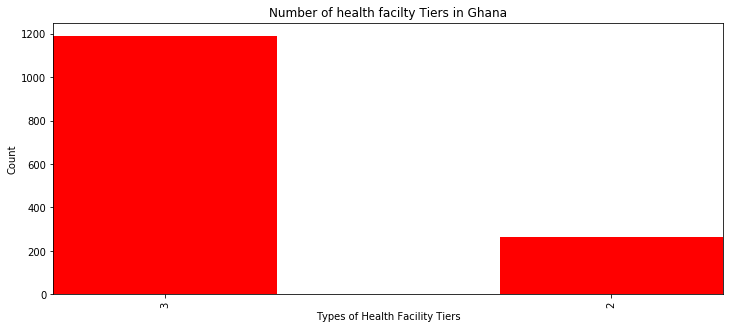

In [51]:
print('Two types of health facility tiers. Tier 2 and Tier 3:',tiers['Tier'].unique())
print('\n')
print('Tier 3 coverage percentage in Ghana:',round(100* len(tiers[tiers['Tier'] == 3])/len(tiers['Tier'])),'%')
print('With a total number of',tiers[tiers['Tier'] == 3]['Tier'].count())

print('\n')
print('Tier 2 coverage percentage in Ghana:',round(100* len(tiers[tiers['Tier'] == 2])/len(tiers['Tier'])),'%')
print('With a total number of',tiers[tiers['Tier'] == 2]['Tier'].count())

print('\n')
ylabel='Count'
xlabel='Types of Health Facility Tiers'
ax = tiers['Tier'].value_counts().plot(kind='bar',figsize=(12,5),title='Number of health facilty Tiers in Ghana',color='red');
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## **OBJECTIVE 2**

*Analysing the distribution of these health facility tiers accross the nation per regions*.


The barplot shows that Tier 3 is the most common accross the nation.
Tier 3 happens to be the most common facility type in the urban cities, that is 'Greater Accra' and the 'Ashanti region'.
Greater Accra has total of 448 tier 3 facilties and 79 tier 2 facilities and the Ashanti region has 223 Tier 3 facilites and 86 tier 2 facilites.

From the data visualised below, the northern parts of Ghana which includes the Northern, UpperWest and UpperEast regions have a low count of health facilites in general (both tier 2 and 3) as compared to the urban regions with a total count,*12* tier 2 facilities and *106* tier 3 facilities in all for the three regions.

In [52]:
tiers_per_region = tiers.groupby(['Region','Tier']).count()
tiers_per_region

Facility
Region        Tier          
Ashanti       2           86
              3          223
Brong Ahafo   2           29
              3           78
Central       2           13
              3           86
Eastern       2           16
              3           74
Greater Accra 2           79
              3          448
Northern      2            6
              3           38
Upper East    2            3
              3           35
Upper West    2            3
              3           33
Volta         2            7
              3           48
Western       2           22
              3          128

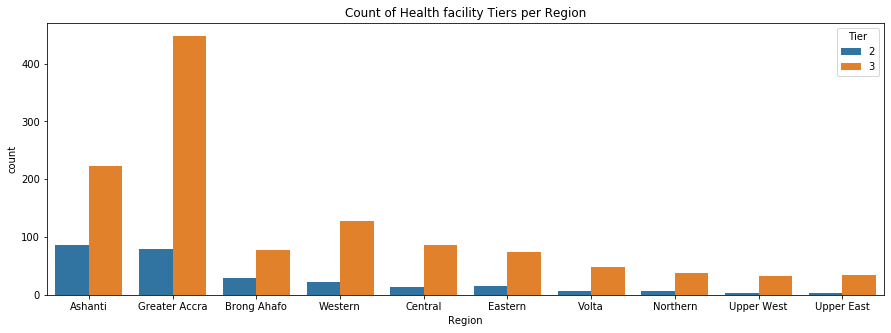

In [53]:
plt.figure(figsize=(15,5));
plt.title('Count of Health facility Tiers per Region');
sns.countplot(data=tiers,x = 'Region',hue='Tier');

In [54]:
max_long = facilities['Longitude'].max()
min_long = facilities['Longitude'].min()
max_lat = facilities['Latitude'].max()
min_lat = facilities['Latitude'].min()

In [55]:
facilities['FacilityName'] = facilities['FacilityName'].str.lower()
tiers['Facility'] = tiers['Facility'].str.lower()
merged = pd.merge(facilities, tiers, left_on=['FacilityName'], right_on=['Facility'])

In [56]:
data = []
for index, tier in enumerate(merged['Tier'].unique()):
    facils = merged[merged['Tier'] == tier]
    data.append(
        go.Scattergeo(
        lon = facils['Longitude'],
        lat = facils['Latitude'],
        text = facils['FacilityName'],
        mode = 'markers',
        marker_color = index,
        name = "Tier " + str(tier)
        )
    )

layout = dict(
        title = 'Health facilities in Ghana based on Tier',
        geo = dict(
        scope = 'africa',
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_long - 5, max_long + 5 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_lat - 1, max_lat + 1 ],
            dtick = 5
        )
    )
)
fig = dict(data = data, layout = layout)
go.Figure(fig)

## **OBJECTIVE 3**

*Examining the five most common type of Health facilities in the Ghana and their spread per each Region*

From the analysis, it is clear that the most common health facilities(5) in Ghana are Clinics, Health Centres, CHPS,Maternity Homes and Hospitals.

The analysis shows that *Greater Accra* has the highest count of available **Clinics** with a total of **281** and the *Ashanti region* comming up at second place with a count of **268** Clinics.

The second most common health facility among the regions is the **Health Centre** which is greatly dominated by the *Volta region* of a total count of **201** and the Ashanti having a count of **132**.

**CHPS** is greatly dominated in the *Western Region* of Ghana (**126**) and a count of **101** for the Central Region.

**Maternity Homes** are mostly populated in the Ashanti region with a count of **112**.

**Hospitals** are less found in the *Upper west* and *East* of Ghana with *Ashanti Region* and *Greater Accra* having the majority count of hospitals at **105** and **101** respectively.




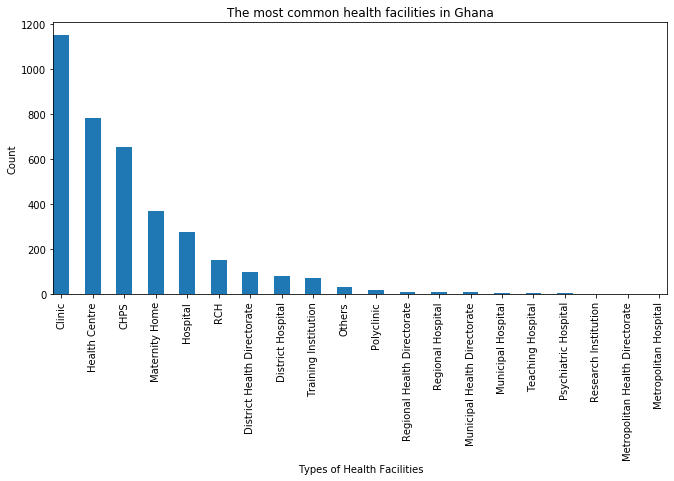

In [57]:
#Examining the overall count of the Health Facilities in Ghana
ylabel='Count'
xlabel='Types of Health Facilities'
ax1 = facilities['Type'].value_counts().plot(kind='bar',figsize=(11,5),title='The most common health facilities in Ghana');
ax1.autoscale(axis='x',tight=True)
ax1.set(xlabel=xlabel, ylabel=ylabel);

In [58]:
#Investigating the 5 most common health facilities and their total counts
facilities['Type'].value_counts().head()

Clinic            1151
Health Centre      781
CHPS               655
Maternity Home     368
Hospital           276
Name: Type, dtype: int64

Lets analyse the distribution of the five most common health facilities in the regions of Ghana

In [59]:
df2 = facilities[facilities['Type'].str.contains('Clinic')]
df2 =df2['Region'].value_counts()

df3 = facilities[facilities['Type'].str.contains('Health Centre')]
df3=df3['Region'].value_counts()

df4 = facilities[facilities['Type'].str.contains('CHPS')]
df4=df4['Region'].value_counts()

df5 = facilities[facilities['Type'].str.contains('Maternity Home')]
df5 = df5['Region'].value_counts()

df6 = facilities[facilities['Type'].str.contains('Hospital')]
df6 = df6['Region'].value_counts()

per_reg = pd.concat([df2, df3,df4,df5,df6], axis=1).reset_index()
per_reg.columns = ['Region','Clinic','Health Centre','CHPS','Maternity Home','Hospital']
per_reg = per_reg.set_index('Region')
per_reg

,Clinic,Health Centre,CHPS,Maternity Home,Hospital
Region,,,,,
Greater Accra,281,23,5,50,101
Ashanti,268,132,14,112,105
Western,188,69,126,44,32
Brong Ahafo,144,55,34,49,27
Eastern,85,45,91,41,28
Central,62,54,101,30,21
Upper East,49,35,95,2,6
Volta,48,201,50,30,28
Northern,16,108,80,6,20


In [60]:
#Analysing the highest count per each health facility
per_reg.describe().loc['max']

Clinic            281.0
Health Centre     201.0
CHPS              126.0
Maternity Home    112.0
Hospital          105.0
Name: max, dtype: float64

**A visual representation of the five most common health facilities in Ghana per region**

In [61]:
per_reg.iplot(kind='bar',barmode='stack',title='Distribution of the five most common health facilities per regional area',xTitle='Regions',yTitle='Count')

In [62]:
data = []
for index, region in enumerate(facilities['Region'].unique()):
    selected_facilities = facilities[facilities['Region'] == region]
    data.append(
        go.Scattergeo(
        lon = selected_facilities['Longitude'],
        lat = selected_facilities['Latitude'],
        text = selected_facilities['FacilityName'],
        mode = 'markers',
        marker_color = index,
        name = region
        )
    )

layout = dict(
        title = 'Health facilities in Ghana based on Region',
        geo = dict(
        scope = 'africa',
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_long - 5, max_long + 5 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_lat - 1, max_lat + 1 ],
            dtick = 5
        )
    )
)
fig = dict(data = data, layout = layout)
go.Figure(fig)



## OBJECTIVE 4

*To analyse and determine whether most health facilites are state-owned or private.*

From the analysis below, the pie chart shows that the *Government* owns **59.1%** of the health facilites whiles *Private ownerships* cover **31.4%**. This indicates that most health facilities in Ghana are **State-owned (Government)** having a total of **2202** Health facilities.

In [63]:
#Structuring into a dataframe
grp_ownships = pd.DataFrame(facilities['Ownership'].value_counts())
grp_ownships['Percentage Ownerships'] = round(100 * (grp_ownships['Ownership']/grp_ownships['Ownership'].sum()),1)
grp_ownships = pd.DataFrame(grp_ownships).reset_index()
grp_ownships.columns = ['Type','Ownership','Percentage Ownerships']

#Pie chart 
fig = px.pie(grp_ownships, values='Ownership', names='Type',
             title='Ownership Percentages', labels=dict(grp_ownships['Ownership']))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [64]:
#Complete list of ownerships
grp_ownships

,Type,Ownership,Percentage Ownerships
0,Government,2202,59.1
1,Private,1171,31.4
2,CHAG,253,6.8
3,Quasi-Government,91,2.4
4,Islamic,5,0.1
5,NGO,3,0.1
